# Lesson 8 Assignment - Abalone Age Determination

## Author - Trupti Gandhi

### Background
Age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements, which are easier to obtain, could be used to predict the age. According to the data provider, original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled (by dividing by 200) for use with machine learning algorithms such as SVMs and ANNs.

The target field is “Rings”. Since the output is continuous the solution can be handled by a Support Vector Regression or it can be changed to a binary Support Vector Classification by assigning examples that are younger than 11 years old to class: ‘0’ and those that are older (class: ‘1’).

Predict the age using the following attributes:
* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried

See [UCI's Abalone Data set](https://archive.ics.uci.edu/ml/datasets/abalone) for more information.

## Tasks
Use the provided abalone.csv file, build an experiment using support vector machine classifier and regression. Complete the following tasks and answer the questions:

1. Convert the continuous output value from continuous to binary (0,1) and build an SVC
2. Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?
3. Test different kernels and hyperparameters or consider using `sklearn.model_selection.SearchGridCV`. Which kernel performed best with what settings?
4. Show recall, precision and f-measure for the best model
5. Using the original data, with rings as a continuous variable, create an SVR model
6. Report on the predicted variance and the mean squared error

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os
import sys
import time
import requests
import datetime
import math

In [2]:
# Data set contains 4177 rows and 9 columns.
#URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/abalone.csv"


The Abalone is a type of marine snail animal. The age of an Abalone can be found by counting the number of rings in its shell using a microscope, which is a laborious task. This collected dataset allows us to attempt to predict the age (rings) of the Abalone without actually counting the rings. Features measured include length, width and weight of the abalone as well as its sex.

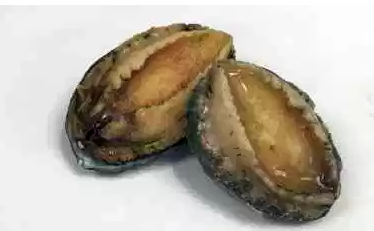

In [3]:
#Taking weather data
AbaloneData = pd.read_csv(r"https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/abalone.csv", header = 0)
AbaloneData.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
AbaloneData.shape

(4177, 9)


In this project, I tried using different methods (some from sklearn libraries) to perform the prediction. The key is to use a number of different measurements (ex. length, diameter, shell weights, etc.) to predict the age of an abalone. In the past, the age is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. However, since there are other measurements done on different attributes, being able to predict the age accurately using these numbers can reduce the amount of labor on this task.

The dataset is acquired from UCI Machine Learning Repository.

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


There are total of 8 attributes and 1 tag . 

In [5]:
AbaloneData.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

Missing Attribute Values: None

In [6]:
#Statistics for numeric domains
AbaloneData.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Name           Data-Type     Meas.    Description
----           ---------    -----    -----------
Sex             nominal             M, F, and I (infant)
Length         continuous    mm     Longest shell measurement
Diameter       continuous    mm     perpendicular to length
Height         continuous    mm     with meat in shell
Whole weight    continuous   grams   whole abalone
Shucked weight  continuous   grams   weight of meat
Viscera weight  continuous   grams   gut weight (after bleeding)
Shell weight    continuous   grams   after being dried
Rings           integer            +1.5 gives the age in years

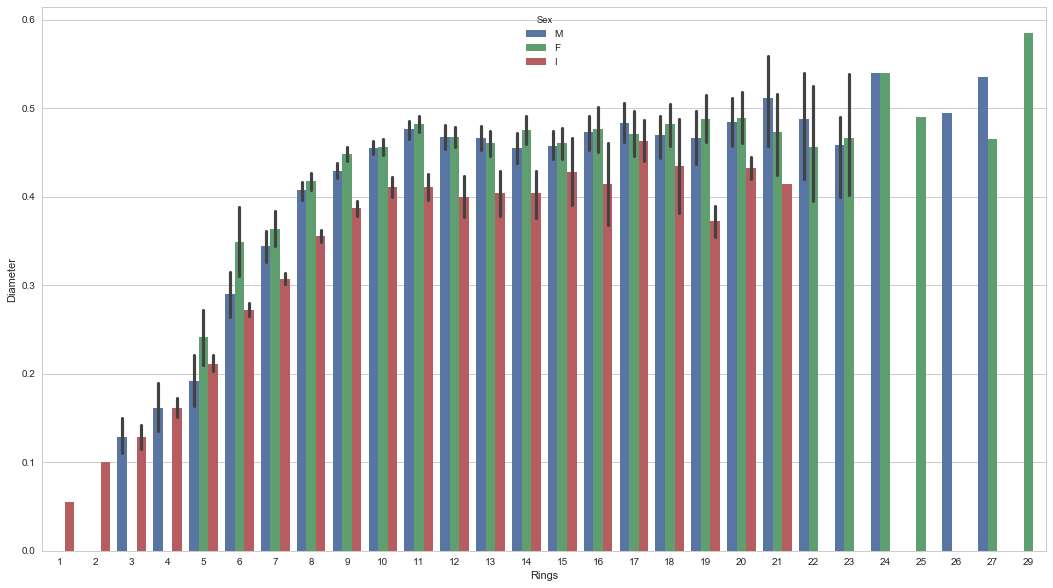

In [7]:
import seaborn as sb
sb.set(style="whitegrid", color_codes="True")
fig = plt.figure(figsize=(18,10)) 
sb.barplot(x='Rings', y='Diameter', hue='Sex', data=AbaloneData)
plt.show()

Graph clearly shows less number of rings are from infants. Large number of rings are from male and female.

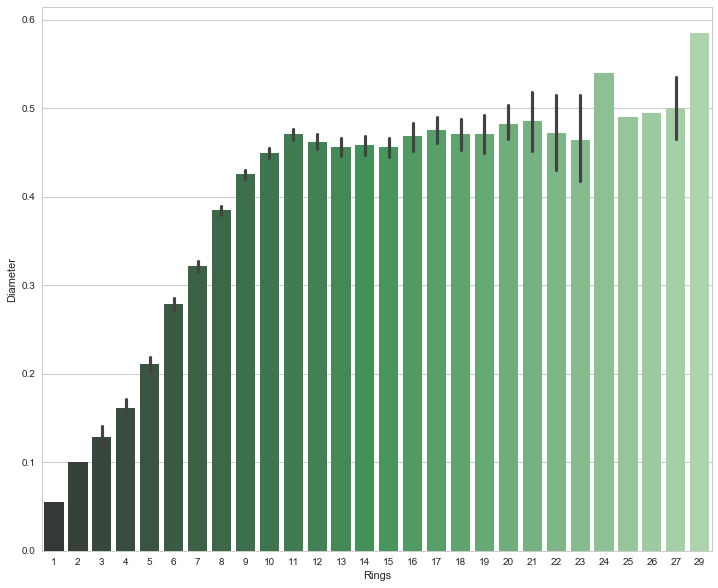

In [8]:
fig = plt.figure(figsize=(12,10)) 
sb.barplot(x='Rings', y='Diameter', data=AbaloneData, palette='Greens_d')
plt.show()

Number of rings and diameter are proportion to each other.

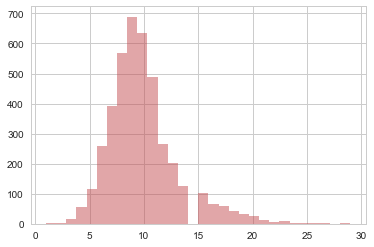

In [9]:
# Look at ring distribution
# i.e. I probably need to weight my classifier so it doesn't predict all around the median.
import matplotlib.pyplot as plt
plt.figure();
AbaloneData['Rings'].hist(bins=30, color='r', alpha=0.5)

Histogram shows 9 and 10 are maximum number for rings.We will calculate the accuracy for these rings

In [10]:

pd.value_counts(AbaloneData['Rings'])

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [11]:
#Print accuracy, MSE, RMS, and MAE if we predict all 9's or 10's as a sanity check.
print ("Accuracy if we predict all 9's:",len(AbaloneData[AbaloneData['Rings']==9])/(1.0*len(AbaloneData['Rings'])))
print ("Accuracy if we predict all 10's:",len(AbaloneData[AbaloneData['Rings']==10])/(1.0*len(AbaloneData['Rings'])))
print ('***********************************************************************')
print ("MSE error if we predict all 9's:",((AbaloneData['Rings']-9)**2).mean())
print ("MSE error if we predict all 10's:",((AbaloneData['Rings']-10)**2).mean())
print ('***********************************************************************')
print ("RMSE error if we predict all 9's:",((AbaloneData['Rings']-9)**2).mean()**.5)
print ("RMSE error if we predict all 10's:",((AbaloneData['Rings']-10)**2).mean()**.5)
print ('***********************************************************************')
print ("MAE error if we predict all 9's:",(abs(AbaloneData['Rings']-9)).mean())
print ("MAE error if we predict all 10's:",(abs(AbaloneData['Rings']-10)).mean())

Accuracy if we predict all 9's: 0.1649509217141489
Accuracy if we predict all 10's: 0.15178357672971032
***********************************************************************
MSE error if we predict all 9's: 11.264543931050994
MSE error if we predict all 10's: 10.397175005985156
***********************************************************************
RMSE error if we predict all 9's: 3.3562693472144027
RMSE error if we predict all 10's: 3.224465072843115
***********************************************************************
MAE error if we predict all 9's: 2.359109408666507
MAE error if we predict all 10's: 2.3627005027531722


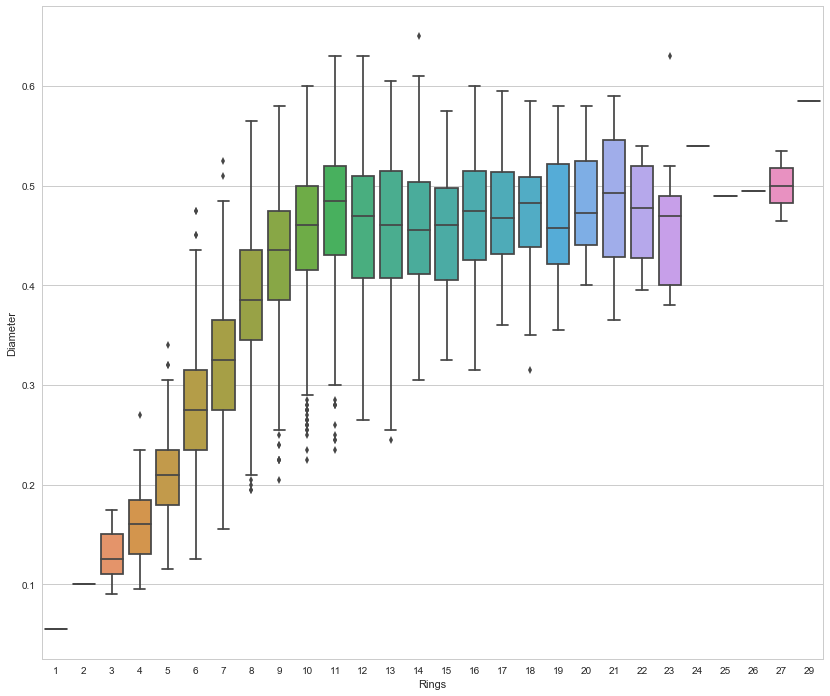

In [12]:
_, ax = plt.subplots(figsize=(14,12))
 
sb.boxplot(x='Rings', y='Diameter', data=AbaloneData, ax=ax)

plt.show()


We can clearly see the outliers on diameter. I am not going to replace it.

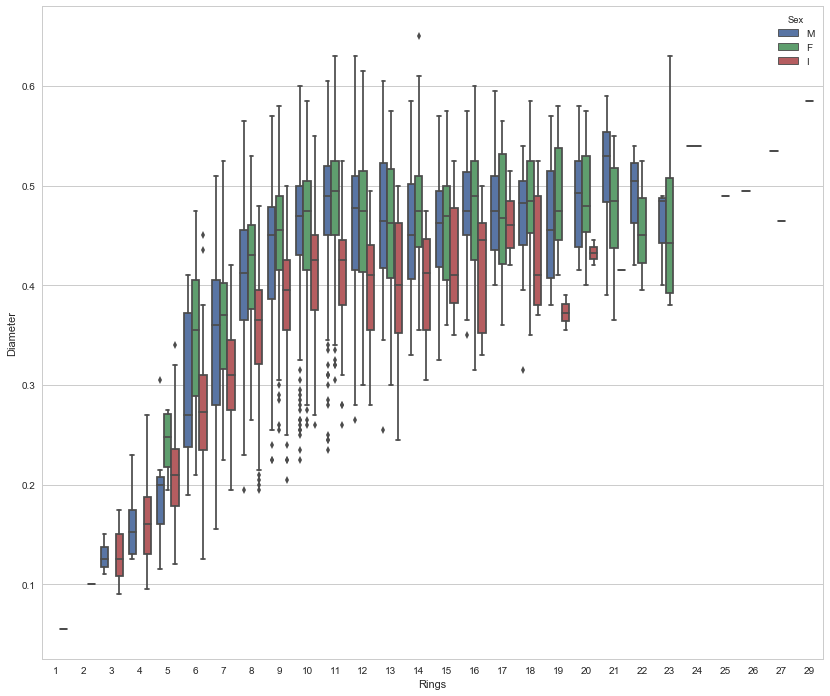

In [13]:
#splitting the rings on sex
_, ax = plt.subplots(figsize=(14,12))
 

sb.boxplot(x='Rings', y='Diameter', hue='Sex', data=AbaloneData, ax=ax)

plt.show()

In [14]:
AbaloneData['Viscera-Shell Weight Ratio'] = AbaloneData['Viscera Weight']/AbaloneData['Shell Weight']
AbaloneData['Viscera-Shucked Weight Ratio'] = AbaloneData['Viscera Weight']/AbaloneData['Shucked Weight']
AbaloneData['Viscera-Whole Weight Ratio']  = AbaloneData['Viscera Weight']/AbaloneData['Whole Weight']

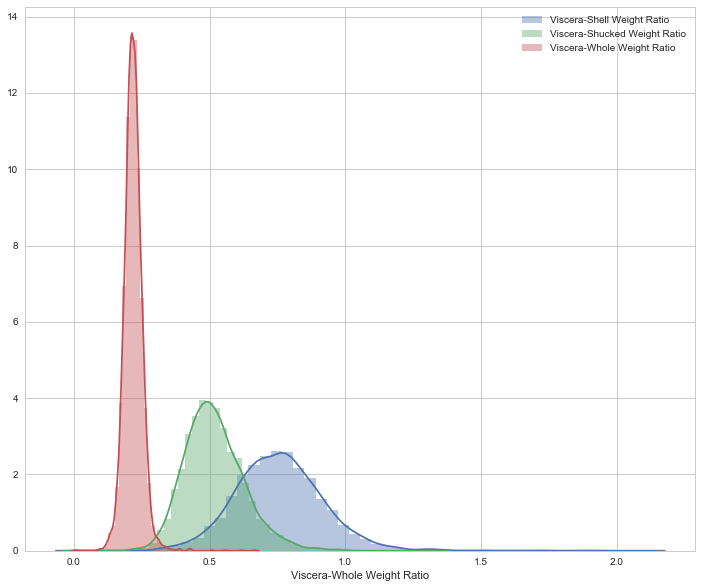

In [15]:
fig = plt.figure(figsize=(12,10)) 

labels = ['Viscera-Shell Weight Ratio','Viscera-Shucked Weight Ratio','Viscera-Whole Weight Ratio']
for lab in labels:
    sns.distplot( AbaloneData[lab], label = lab)

plt.legend()
plt.show()

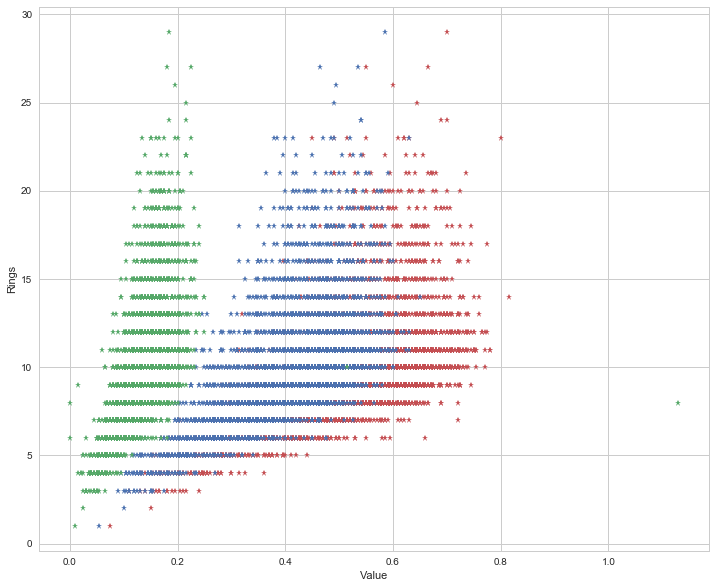

In [16]:
fig = plt.figure(figsize=(12,10)) 

plt.plot( AbaloneData['Length'],AbaloneData['Rings'], 'r*' )
plt.plot( AbaloneData['Diameter'],AbaloneData['Rings'], 'b*' )
plt.plot( AbaloneData['Height'],AbaloneData['Rings'], 'g*' )

plt.ylabel('Rings')
plt.xlabel('Value')
    

plt.show()

Graph clearly shows rings have less height shows in green, diameter in in blue and length is in Red.


These all are linearly proportional to rings.


Three variables relate to the abalone's physical dimensions; these give us a "volume" dimension (units of length cubed). Let's use this volumn to compare with weight. 

In [17]:
AbaloneData['Volume']= AbaloneData['Length']*AbaloneData['Diameter']*AbaloneData['Height']


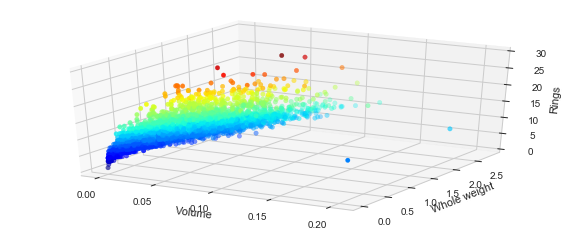

In [18]:
fig = plt.figure(figsize=(10,4))

colors=AbaloneData['Rings'].apply(lambda x : float(x) ).values
colors -= colors.min()
colors *= (1.0/colors.max())
cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.jet
plot_color = cm(colors)

ax1 = fig.add_subplot(111,projection='3d')

ax1.scatter(AbaloneData['Volume'], AbaloneData['Whole Weight'] , AbaloneData['Rings'], c=plot_color)
ax1.set_xlabel('Volume')
ax1.set_ylabel('Whole weight')
ax1.set_zlabel('Rings')

plt.show()




The above figure is an important one to understanding our system. The plot shows two measured variables - volumn  and the whole weight of the abalone. These map to the age of the abalone, indicated by the color and height of the points, along a three-dimensional surface. This indicates a clear relationship between the size of the abalone and its weight.

In [19]:
Sex_dummies = pd.get_dummies(AbaloneData.Sex, prefix = 'Sex').iloc[:,1:]

In [20]:
AbaloneData_new = pd.concat([AbaloneData,Sex_dummies], axis = 1)

In [21]:
AbaloneData_new.drop('Sex', axis = 1, inplace = True)

In [22]:
AbaloneData_new.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Viscera-Shell Weight Ratio,Viscera-Shucked Weight Ratio,Viscera-Whole Weight Ratio,Volume,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.673333,0.449889,0.196498,0.015777,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.692857,0.487437,0.215078,0.008347,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.673810,0.551657,0.209010,0.030051,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.735484,0.529002,0.220930,0.020075,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.718182,0.441341,0.192683,0.006732,1,0


In [23]:
M = AbaloneData[AbaloneData['Sex']=='M']
F = AbaloneData[AbaloneData['Sex']=='F']
I = AbaloneData[AbaloneData['Sex']=='I']

Text(0.5,1,'Infants Rings in 30 bins')

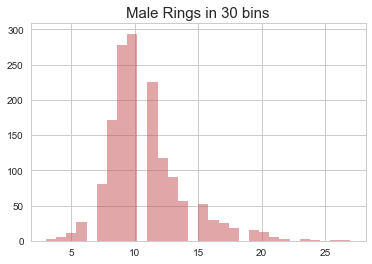

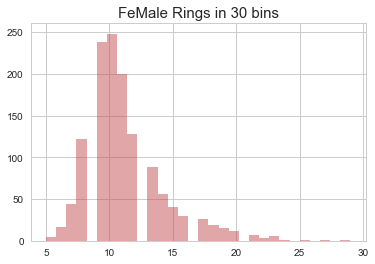

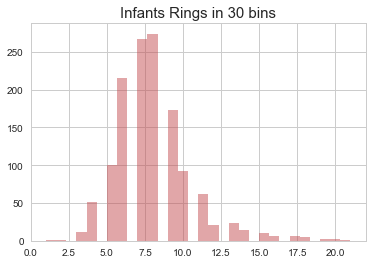

In [24]:
# Look at ring distribution of the data split into M,F,I and with those 18 outliers cleaned.

plt.figure();
M['Rings'].hist(bins=30, color='r', alpha=0.5)
plt.title("Male Rings in 30 bins", fontsize = 15)
plt.figure();
F['Rings'].hist(bins=30, color='r', alpha=0.5)
plt.title("FeMale Rings in 30 bins", fontsize = 15)
plt.figure();
I['Rings'].hist(bins=30, color='r', alpha=0.5)
plt.title("Infants Rings in 30 bins", fontsize = 15)

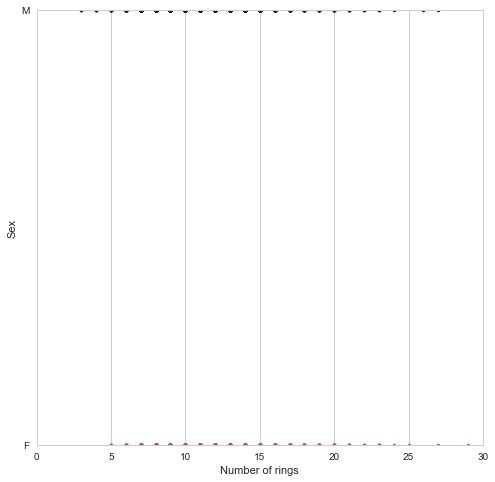

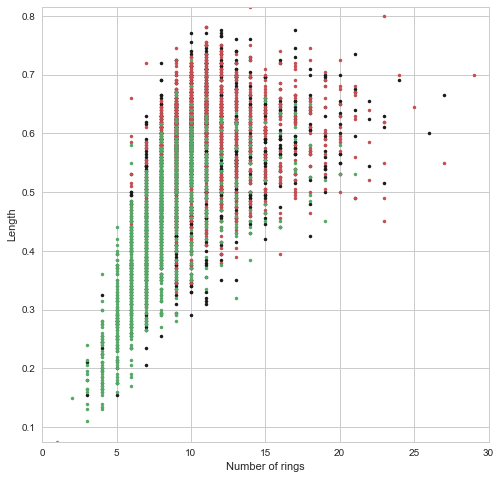

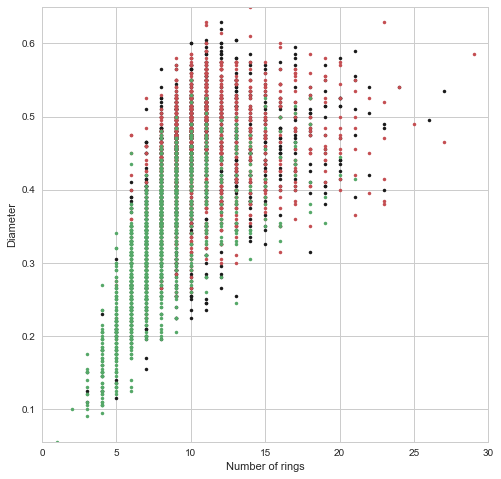

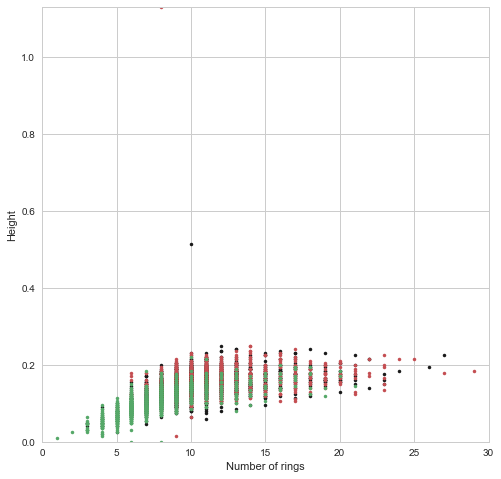

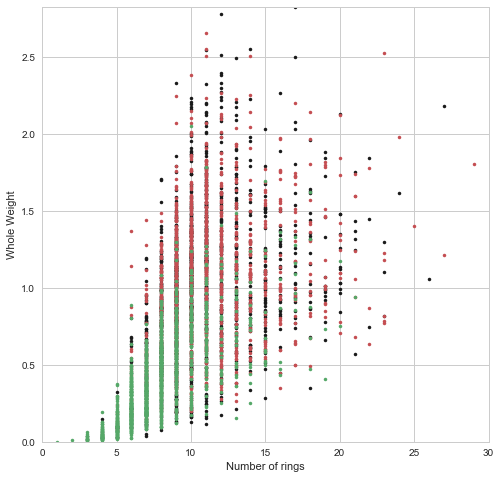

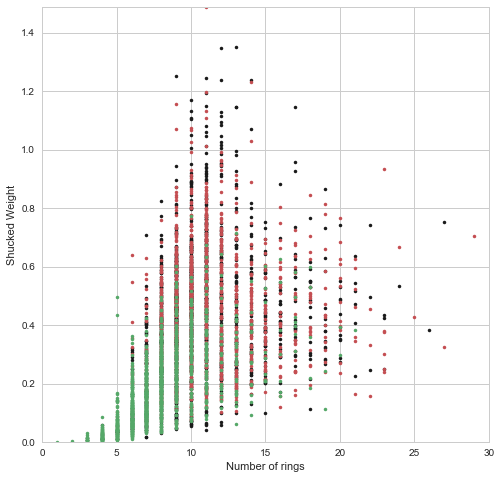

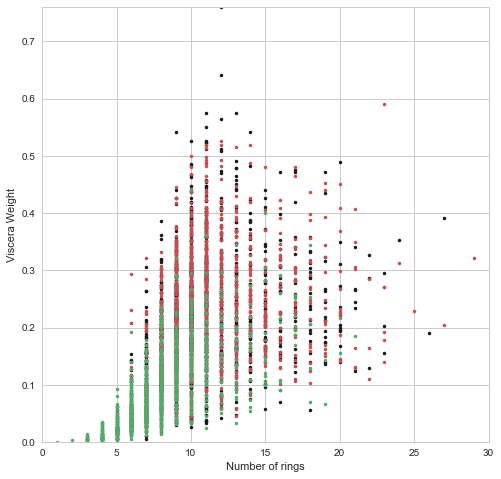

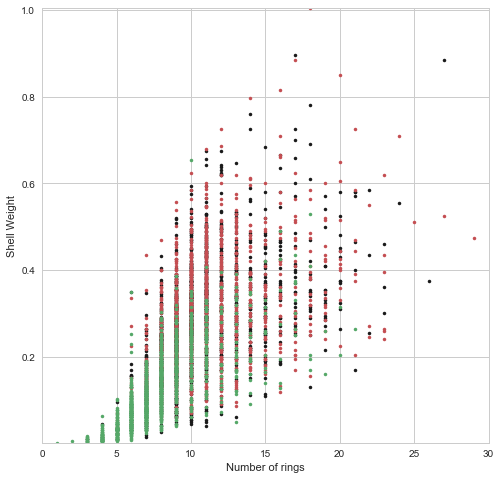

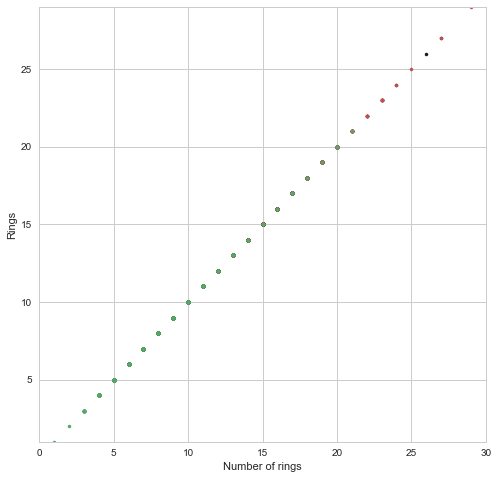

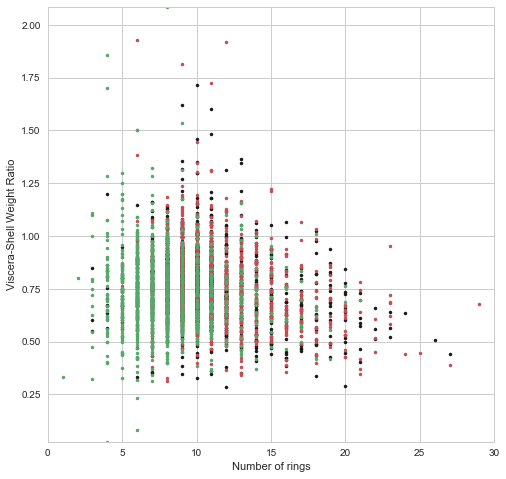

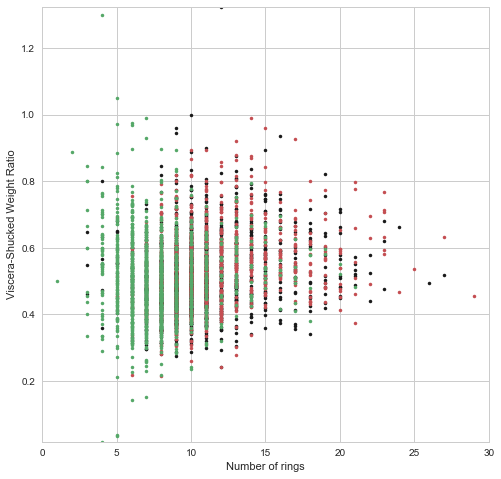

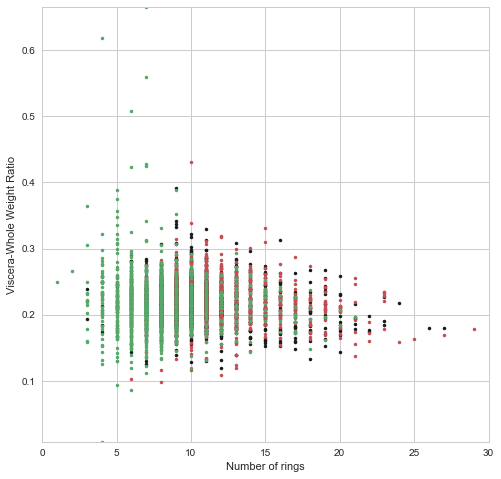

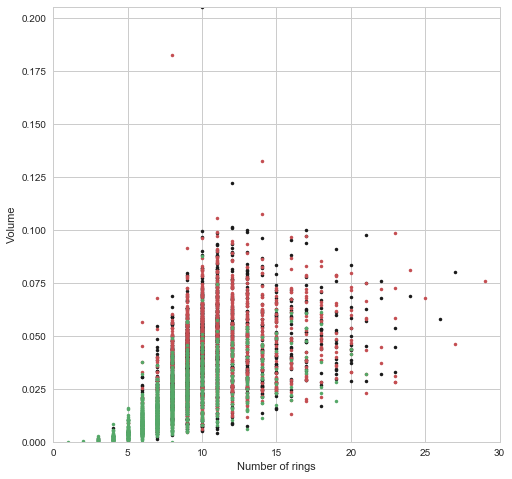

In [25]:
# Initial visualization to get a feel for the data.
# M,F,I split and coded as colors in to plots.
# A few outliers particularly height at ring~7,10.
for item in list(M):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(M['Rings'], M[item], '.k')
    ax.plot(F['Rings'], F[item], '.r')
    ax.plot(I['Rings'], I[item], '.g')
    ax.set_xlim(0, 30)
    ax.set_ylim(min([M[item].min(),F[item].min(),I[item].min()]), max([M[item].max(),F[item].max(),I[item].max()]))
    ax.set_xlabel('Number of rings')
    ax.set_ylabel(item)
    fig.show

In [26]:
AbaloneData1_SRV = AbaloneData_new[['Sex_I', 'Sex_M','Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Rings']]

In [27]:
X = AbaloneData1_SRV.iloc[:,0:8]
Y = AbaloneData1_SRV.iloc[:,9]

This dataset consists of 4177 samples with an age distribution as shown here. I set aside 25% of this dataset for test, and trained on the remaining 75%. 

In [28]:
Y = Y.reshape(-1,1)

C:\Users\V-TRUGAN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

C:\Users\V-TRUGAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Supervised learning methods used for classification, regression and outliers detection.

Let's assume we have two classes here - black and purple. In classification, we are interested in the best way to separate the two classes.



We can separate them with a line such as the example below. You can consider this as an example of how logistic regression would segregate the two classes.



However, there are infinite lines (in 2-dimensional space) or hyperplanes (in 3-dimensional space) that can be used to separate the two classes as the example below illustrates.

The term hyperplane essentially means it is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. ~ Wikipedia



In SVM, the separating line, the solid brown line, is the line that allows for largest margin between the two classes.

SVM would place the separating line in the middle of the margin, also called maximum margin. SVM will optimise and locate the hyperplane that maximises the margin of the two classes.

The samples that are closest to the hyperplane are called support vectors, circled in red.

SVR is a bit different from SVM. As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM

#### Model 1

In [31]:
# Fitting the SVR model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')



In [32]:
# Train the model using the training sets
regressor.fit(X_Train, Y_Train)

C:\Users\V-TRUGAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
# Make predictions on the test data
pred1=regressor.predict(X_Test)

In [34]:
print(" **** Model 1 Calculations with kernel rbf**** ")
print("Score:", regressor.score(X_Test,Y_Test ))

from sklearn.metrics import r2_score
print("r2_Score: ", r2_score(Y_Test,pred1) )

# Mean absolute error
MAE = np.mean(abs(pred1 - Y_Test))
print("Mean absolute error", MAE)

from sklearn.metrics import accuracy_score, roc_curve,auc
# Root mean square error
RMSE1 = np.mean((pred1 - Y_Test) ** 2)**.5

print ("Root mean square error: RMSE: ", RMSE1)


 **** Model 1 Calculations with kernel rbf**** 
Score: 0.5649125458234784
r2_Score:  0.5649125458234784
Mean absolute error 0.9330847245660524
Root mean square error: RMSE:  1.2166774028086633


<bound method Figure.show of <matplotlib.figure.Figure object at 0x14C4FFD0>>

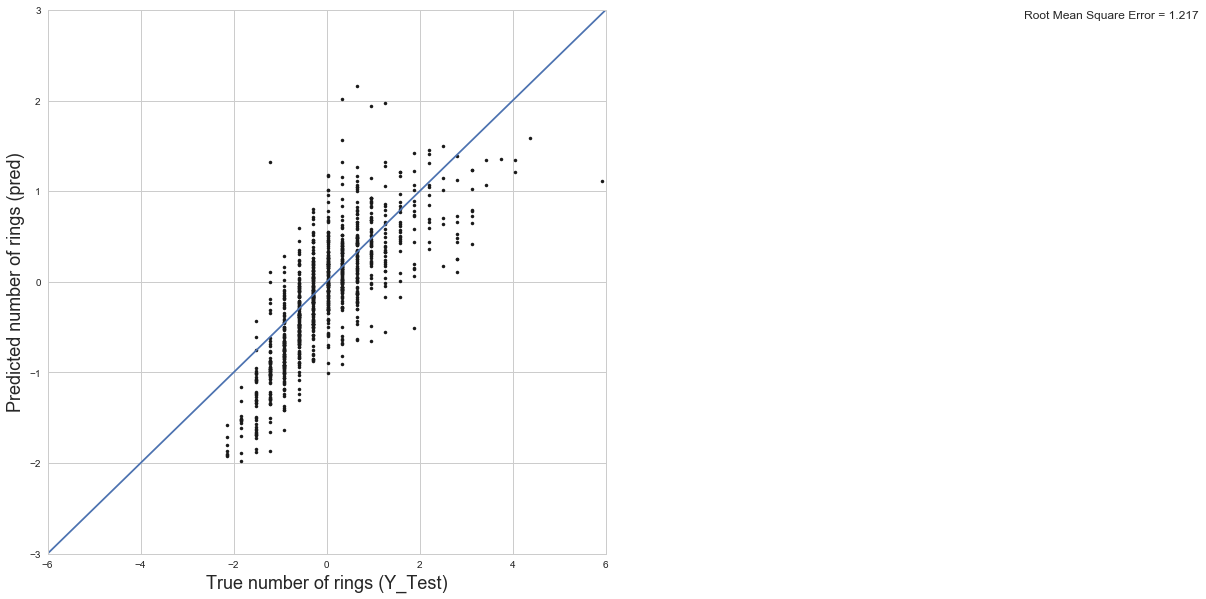

In [35]:
# Plot predicted vs. actual for the test data
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Y_Test, pred1, '.k')
ax.plot([-6,6], [-3,3])
    
ax.text(15, 3,
        "Root Mean Square Error = %.4g" % RMSE1,
        ha='left', va='top')
    
ax.set_xlim(-6, 6)
ax.set_ylim(-3, 3)
    
ax.set_xlabel('True number of rings (Y_Test)', fontsize = 18)
ax.set_ylabel('Predicted number of rings (pred)', fontsize = 18)
fig.show

#### Model 2

In [36]:
#LET’S TUNE SO PARAMETERS TO SEE IF WE CAN GET BETTER SCORE:
#kernel=’linear’ → we are setting the kernel to a linear kernel
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'linear')
regressor2.fit(X_Train, Y_Train)
pred2 =regressor2.predict(X_Test)
print(regressor2.score(X_Test,Y_Test))
print(r2_score(Y_Test,pred2))

C:\Users\V-TRUGAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5216403589138091
0.5216403589138091


In [37]:
print(" **** Model 2 Calculations with kernel Linear**** ")
print("Score:", regressor.score(X_Test,Y_Test ))

from sklearn.metrics import r2_score
print("r2_Score: ", r2_score(Y_Test,pred2) )

# Mean absolute error
MAE = np.mean(abs(pred2 - Y_Test))
print("Mean absolute error", MAE)

from sklearn.metrics import accuracy_score, roc_curve,auc
# Root mean square error
RMSE2 = np.mean((pred2 - Y_Test) ** 2)**.5

print ("Root mean square error,  RMSE", RMSE2)


 **** Model 2 Calculations with kernel Linear**** 
Score: 0.5649125458234784
r2_Score:  0.5216403589138091
Mean absolute error 0.9329247214292083
Root mean square error,  RMSE 1.2247120936796554


<bound method Figure.show of <matplotlib.figure.Figure object at 0x14D13B30>>

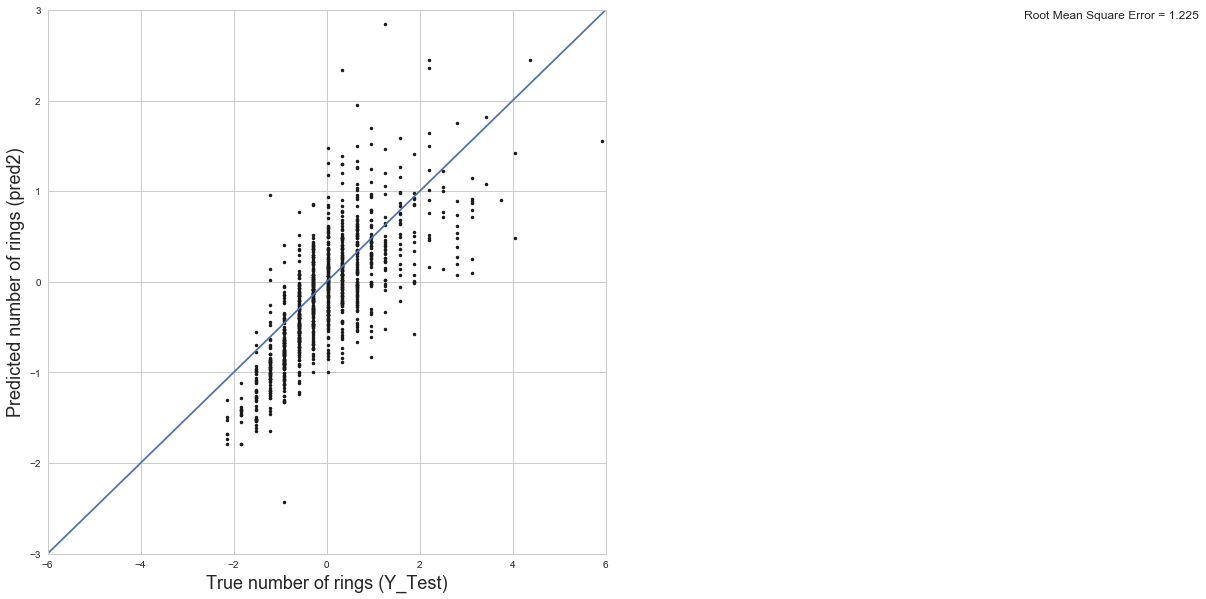

In [38]:
# Plot predicted vs. actual for the test data
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Y_Test, pred2, '.k')
ax.plot([-6,6], [-3,3])
    
ax.text(15, 3,
        "Root Mean Square Error = %.4g" % RMSE2,
        ha='left', va='top')
    
ax.set_xlim(-6, 6)
ax.set_ylim(-3, 3)
    
ax.set_xlabel('True number of rings (Y_Test)', fontsize = 18)
ax.set_ylabel('Predicted number of rings (pred2)', fontsize = 18)
fig.show

Both .score() and r2_score gives us a accuracy score prediction

#### Model 3

In [39]:
#LET’S TUNE SO PARAMETERS TO SEE IF WE CAN GET BETTER SCORE:
regressor3 = SVR(kernel='rbf',epsilon=1.0,degree=3)
regressor3.fit(X_Train, Y_Train)
pred3 =regressor3.predict(X_Test)
print(regressor3.score(X_Test,Y_Test))
print(r2_score(Y_Test,pred3))



0.5013276050184452
0.5013276050184452


C:\Users\V-TRUGAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:

print(" **** Model 3 Calculations with kernel='rbf',epsilon=1.0,degree=3  **** ")
print("Score:", regressor.score(X_Test,Y_Test ))

from sklearn.metrics import r2_score
print("r2_Score: ", r2_score(Y_Test,pred3) )

# Mean absolute error
MAE = np.mean(abs(pred3 - Y_Test))
print("Mean absolute error", MAE)

from sklearn.metrics import accuracy_score, roc_curve,auc
# Root mean square error
RMSE3 = np.mean((pred3 - Y_Test) ** 2)**.5
print ("Root mean square error,  RMSE", RMSE3)


 **** Model 3 Calculations with kernel='rbf',epsilon=1.0,degree=3  **** 
Score: 0.5649125458234784
r2_Score:  0.5013276050184452
Mean absolute error 0.9538237557785945
Root mean square error,  RMSE 1.2136936715104125


<bound method Figure.show of <matplotlib.figure.Figure object at 0x14F5D430>>

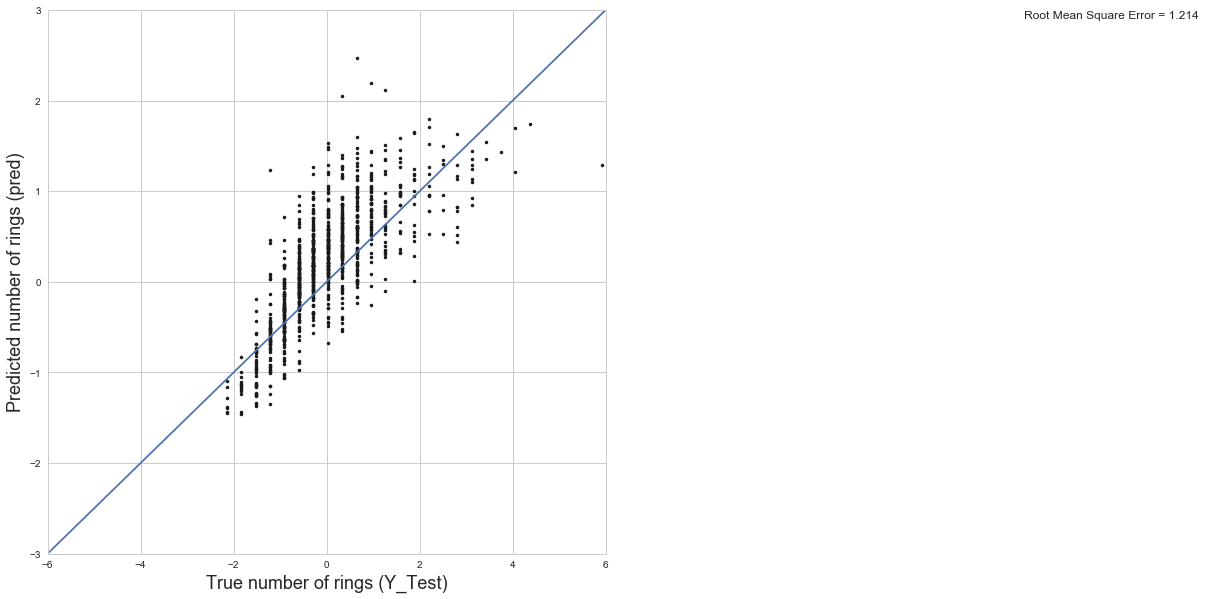

In [41]:
# Plot predicted vs. actual for the test data
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Y_Test, pred3, '.k')
ax.plot([-6,6], [-3,3])
    
ax.text(15, 3,
        "Root Mean Square Error = %.4g" % RMSE3,
        ha='left', va='top')
    
ax.set_xlim(-6, 6)
ax.set_ylim(-3, 3)
    
ax.set_xlabel('True number of rings (Y_Test)', fontsize = 18)
ax.set_ylabel('Predicted number of rings (pred)', fontsize = 18)
fig.show

** Model 1 shows better r_score. I will pick 1st Model. **

** Linear SVM Classification**
- Support Vectors
- Separate with a straight line (linearly separable)
-  Margin
   * Hard margin classification
      - Strictly based on those that are at the margin between the two classes
      - However, this is sensitive to outliers
   * Soft margin classification
      - Widen the margin and allows for violation
      - With Python Scikit-Learn, you control the width of the margin
      - Control with C hyperparameter
          . smaller C leads to a wider street but more margin violations
          .  High C - fewer margin violations but ends up with a smaller margin

In [200]:
AbaloneData2_SRC = AbaloneData_new[['Sex_I', 'Sex_M','Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Rings']]

In [201]:
#Convert the continuous output value from continuous to binary (0,1) and build an SVC
#younger than 11 years old to class: ‘0’ and those that are older (class: ‘1’).
threshold = 11
AbaloneData2_SRC['new_Rings'] = AbaloneData2_SRC['Rings'].gt(threshold).astype(int)
print (AbaloneData2_SRC['new_Rings'].loc[0:5])

0    1
1    0
2    0
3    0
4    0
5    0
Name: new_Rings, dtype: int32


C:\Users\V-TRUGAN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [202]:
AbaloneData2_SRC.head()

,Sex_I,Sex_M,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,new_Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [203]:
AbaloneData_SRC= AbaloneData2_SRC[['Sex_I', 'Sex_M','Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'new_Rings']]

In [204]:
# Separate Features from Target
X = AbaloneData_SRC.iloc[:, 0:8]   # load features into X DF
Y = AbaloneData_SRC.iloc[:, 9]     # Load target into Y DF

In [205]:
print(X.shape)
print(Y.shape)

(4177, 8)
(4177,)


In [235]:
from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [207]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test.shape)

(3341, 8)
(3341,)
(836, 8)
(836,)
(836, 8)


SVM are sensitive to feature scaling

In [208]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std_train = sc.fit_transform(X_train)


* Documentations on each:
- LinearSVC


Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.


- SVC
  C-Support Vector Classification.
  
The implementation is based on libsvm. 


The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [209]:
from sklearn import svm
C = 1.0 #0.01
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [210]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [211]:
# Cross Validation within Train Dataset
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))


Average Accuracy: 	 0.8297
Accuracy SD: 		 0.0134


In [212]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [213]:
confusion_matrix(y_train, y_train_pred)

array([[2487,   94],
       [ 479,  281]], dtype=int64)

In [214]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.8182
Recall Score: 		 0.8285
F1 Score: 		 0.8054


In [215]:
#Cross Validation within Test Dataset

y_test_pred = cross_val_predict(clf, sc.transform(X_test), y_test, cv=3)

In [216]:
confusion_matrix(y_test, y_test_pred)

array([[615,  21],
       [122,  78]], dtype=int64)

In [217]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.8233
Recall Score: 		 0.8289
F1 Score: 		 0.8063


#### Grid Search

In [218]:
from sklearn.pipeline import Pipeline

In [219]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [220]:
#we can improve this by scaling the features
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [221]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [222]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')

In [223]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   20.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [224]:
svm_grid_rbf.best_score_

0.8356779407363065

In [225]:
best = svm_grid_rbf.best_estimator_.get_params()

In [226]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))


	clf__C: 	 20.00
	clf__gamma: 	 0.75


Conducting validation in the test dataset

In [227]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [228]:
confusion_matrix(y_test, y_test_pred)

array([[611,  25],
       [114,  86]], dtype=int64)

In [229]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 0.8265
Recall Score: 		 0.8337
F1 Score: 		 0.8154


SVC gives us 82% Accuracy. 

#### Advantages and Disadvantages
The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Uses only a subset of training points (support vectors) in the decision function.
- Many different Kernel functions can be specified for the decision function.
- Linear
- Polynomial
- RBF
- Sigmoid
- Custom


#### The disadvantages of support vector machines include:

- Beware of overfitting when num_features > num_samples.
- Choice of Kernel and Regularization can have a large impact on performance
- No probability estimates